In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

: 

# Data Understanding and Exploration

In [36]:
#Reading the data
df1 = pd.read_csv("data\TelcomCustomer-Churn_1.csv")
df2 = pd.read_csv("data\TelcomCustomer-Churn_2.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data\\TelcomCustomer-Churn_1.csv'

In [ ]:
#Checking the first 5 rows of data frame 1
df1.head()

In [22]:
#Checking the first 5 rows of data frame 2
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Checking the columns of dataframe 1
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [6]:
#Checking the columns of dataframe 2
df2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Merging both the dataframe on key 'customerID'
df_merged = pd.merge(df1,df2,on='customerID')

In [8]:
df_merged.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Checking all the columns of df1 incorporated in df_merged 
df1.columns.isin(df_merged.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [10]:
#Checking all the columns of df2 incorporated in df_merged
df2.columns.isin(df_merged.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

We can see that all the columns of df1 and df2 is incorporated in df_merged

In [11]:
#Checking the shape of merged dataframe
df_merged.shape

(7043, 21)

There are 7043 rows or datapoints and 21 columns.

In [12]:
#Checking the information about the columns
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here, only tenure, MonthlyCharges and Totalcharges are continuous variable. So we need to convert datatypes of TotalCharges.

And, SeniorCitizen type should be categorical.

# Data Cleaning and Analysis 

In [13]:
#Checking the missing values in the dataframe
df_merged.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset.

In [14]:
#Checkig the datatypes of the feature
df_merged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* SeniorCitizen column should be categorical. So we need to convert the datatype to categorical.
* We can observe that TotalCharges column data type should be float, but we are getting as object. So there might be string values in the dataset. We need to check the string values.

In [15]:
#Checking the unexpected values
x = pd.DataFrame(df_merged.TotalCharges.str.isspace())
df_merged[x['TotalCharges']==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
#Checking the blank values in the TotalCharges column
df_merged['TotalCharges'][df_merged['TotalCharges']==' '].value_counts()

TotalCharges
     11
Name: count, dtype: int64

There are 11 blank values in the Totalcharges column. We can remove this data points.

In [17]:
#Removing the blanks values
df_merged = df_merged.drop(index=df_merged['TotalCharges'][df_merged["TotalCharges"]==' '].index,axis=0)

In [18]:
#Converting SeniorCitizen Column data type to categorical
df_merged['SeniorCitizen'] = df_merged['SeniorCitizen'].astype("category")

In [19]:
#converting Tenure, MonthlyCharges and TotalCharges Column datatype tof float
df_merged['tenure']=df_merged['tenure'].astype('float')
df_merged['MonthlyCharges']=df_merged['MonthlyCharges'].astype('float')
df_merged['TotalCharges']=df_merged['TotalCharges'].astype('float')

In [20]:
#Converting all object datype to category
for col in df_merged.columns:
    if df_merged[col].dtype.name =='object':
        df_merged[col] = df_merged[col].astype("category")

In [21]:
#Checking the datatypes after converting
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   float64 
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [22]:
#Checking the summary of the data
df_merged.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Since, customer id is unique for everyone, so we can remove that variable from the analysis as it will not add any value.

In [23]:
#Removing the customerID column
df_merged = df_merged.drop('customerID',axis=1)

In [24]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts(df_pie):
    
    #isolate the categorical variable names
    cat = []
    for col in df_pie.columns:
        if (df_pie[col].dtype.name) == 'category':
            cat.append(col)
        
    plt.figure(figsize=(20, 25))
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns
    ncols = 3
    # calculate number of rows
    nrows = (len(cat) // ncols)+1
    
    # loop through the length of 'b' and keep track of index
    for n, col in zip(np.arange(len(cat)),cat):
        ax = plt.subplot(nrows, ncols, n+1)
        df_pie[col].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax)   
        ax.set_title(col.upper())
    plt.show()

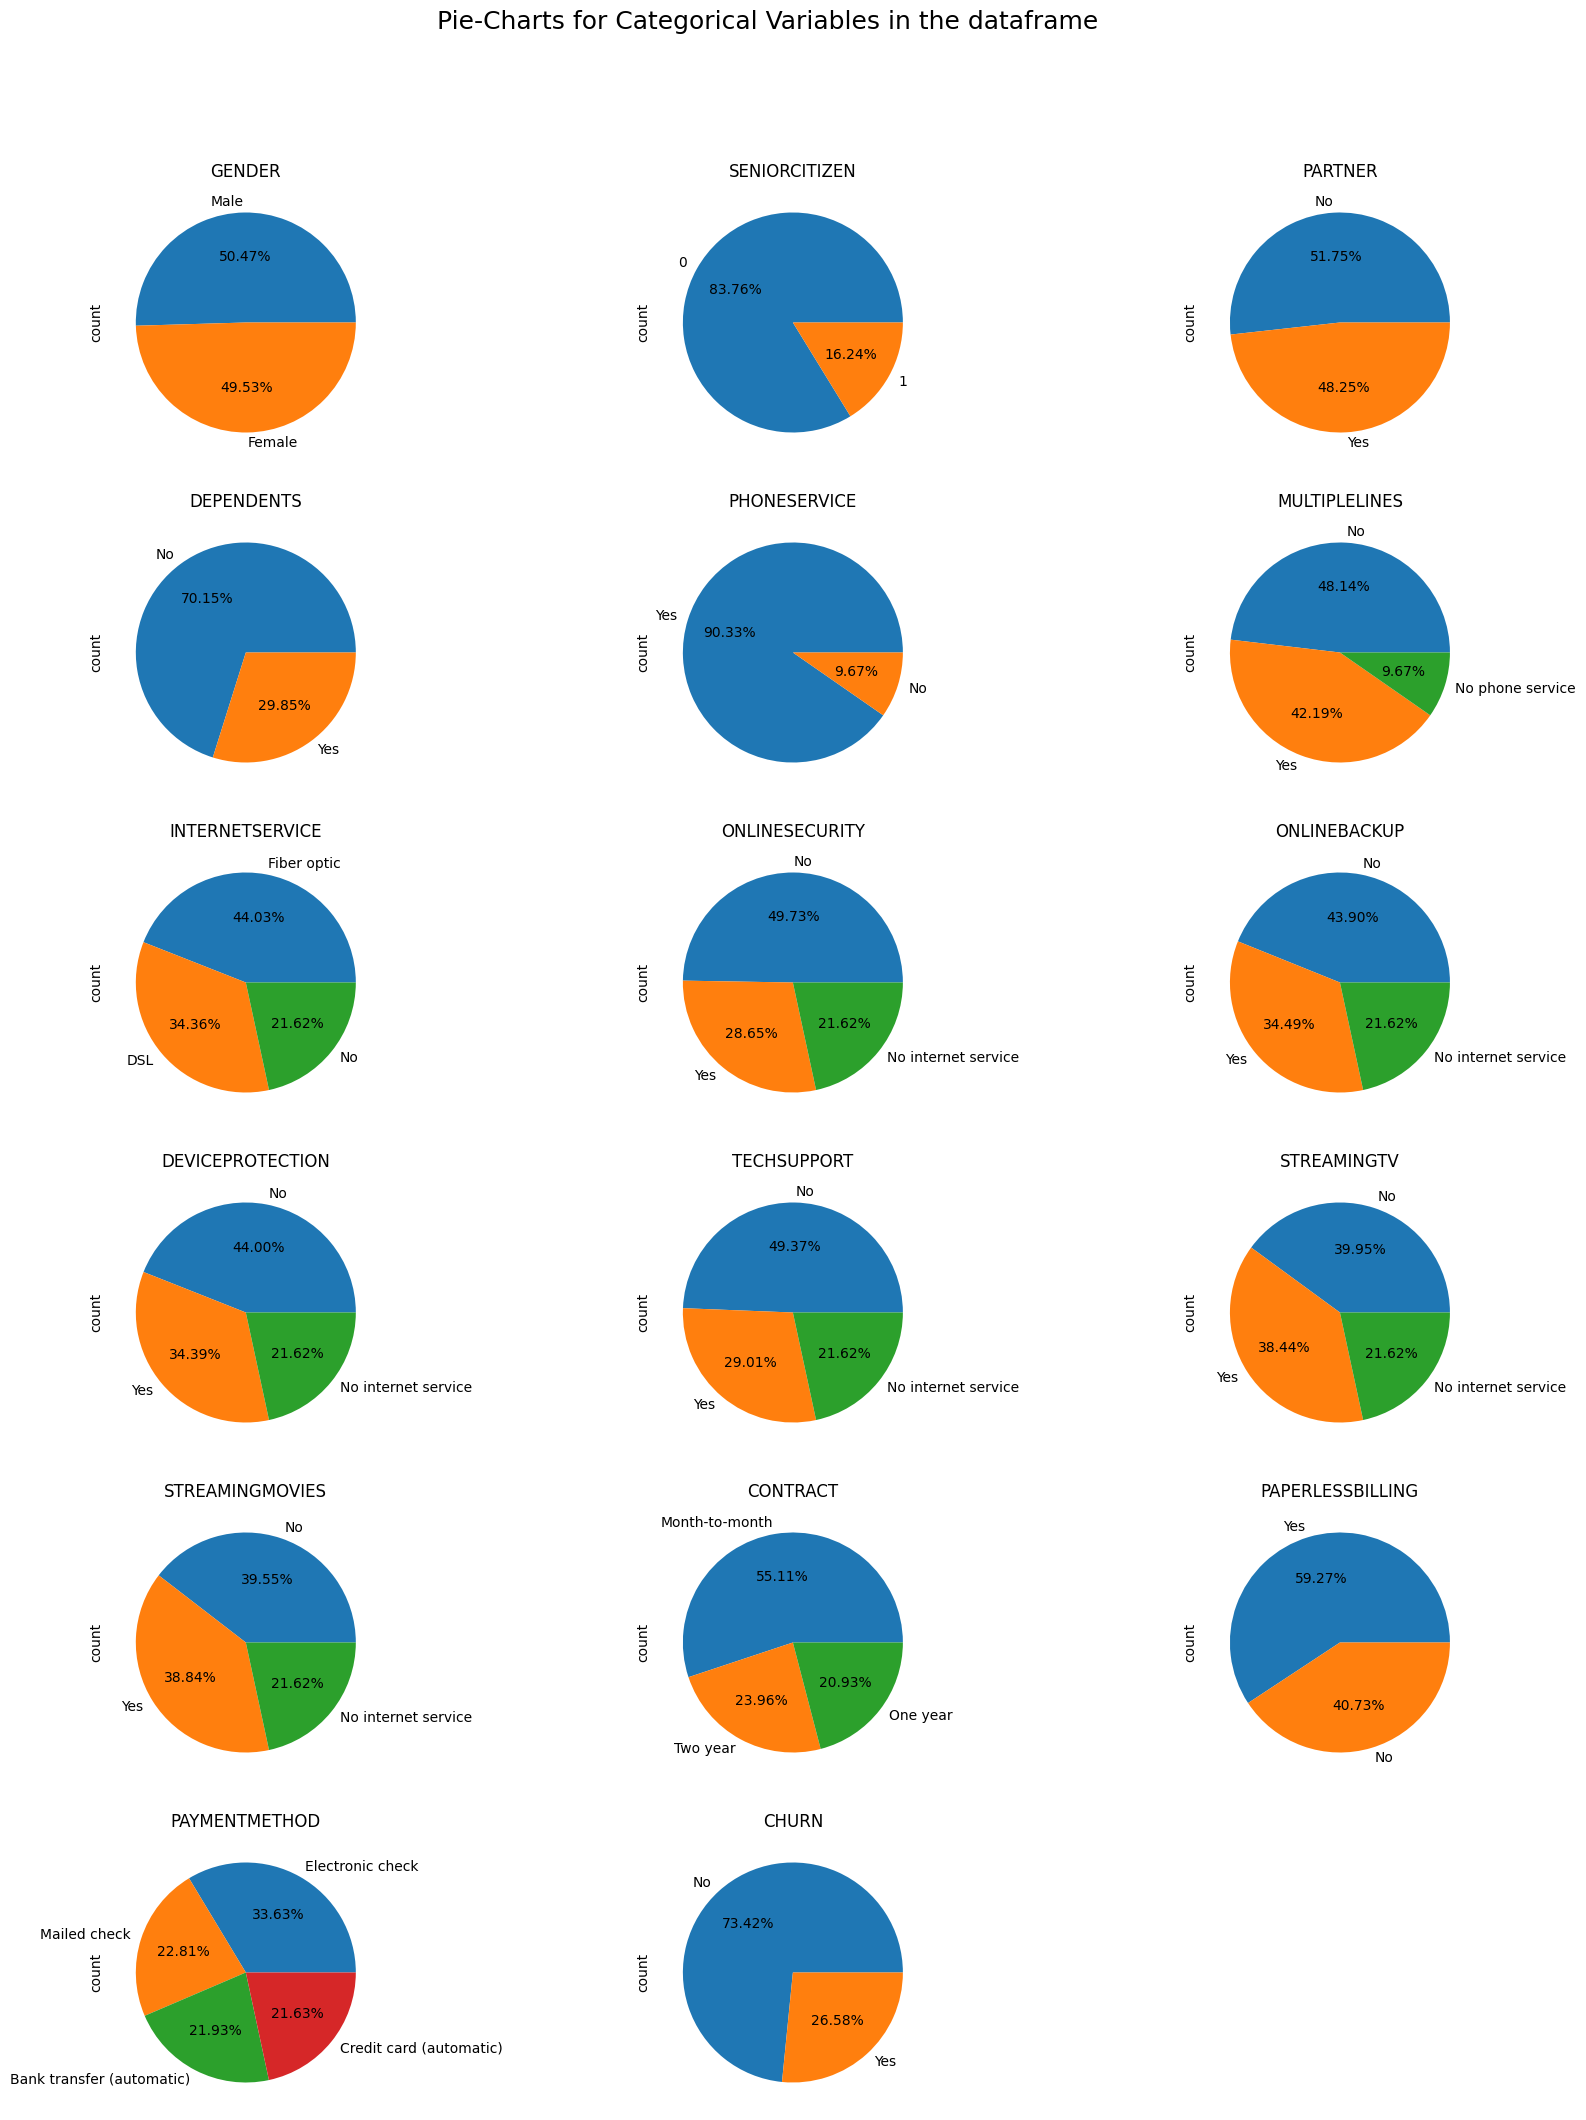

In [25]:
pie_charts(df_merged)

* In Senior citizen, 83.76% is of category "0" and 16.24% is of category "1". Data is unbalanced in this column.
* In Phone Service, 90.33% of the people usses phone service and 9.67% of the people doesn't use phone service. Data is bit unbalaced in this column.
* In Multiple lines, only 9.67% have no phone service.
* Also in the target variable Churn, 73.42% is of "No" category and 26.58% is of "Yes" category. So data is unbalanced.
* Rest of the feature have almost equal distribution between the categories.

<Axes: xlabel='TotalCharges', ylabel='Count'>

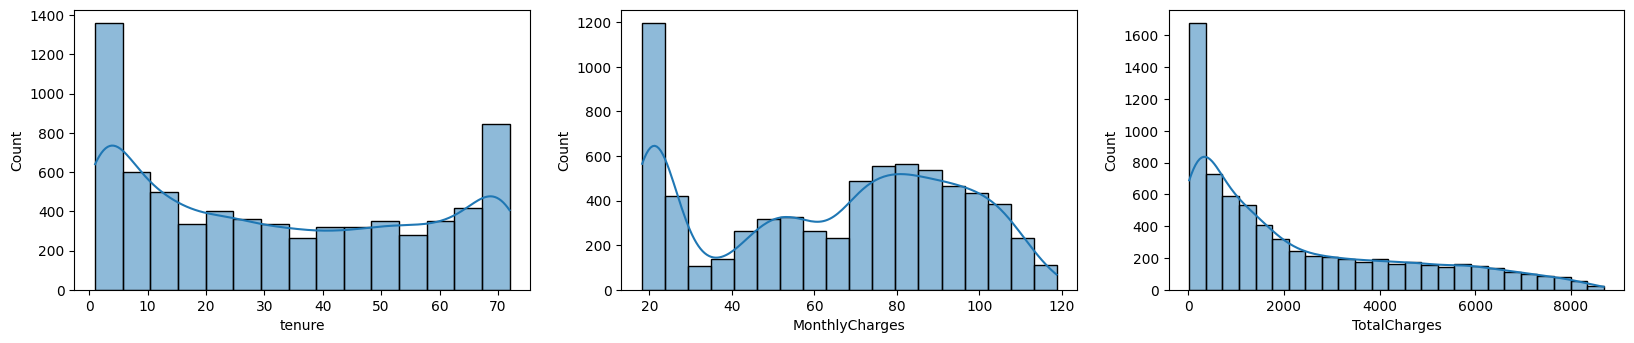

In [26]:
#Plotting distribution of continuous variable
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.histplot(x=df_merged['tenure'],kde=True)
plt.subplot(2,3,2)
sns.histplot(x=df_merged['MonthlyCharges'],kde=True)
plt.subplot(2,3,3)
sns.histplot(x=df_merged['TotalCharges'],kde=True)

* There is no proper distribution of the variable.
* We can see that the distribution of TotalCharge is right skewed.

<Figure size 2000x800 with 0 Axes>

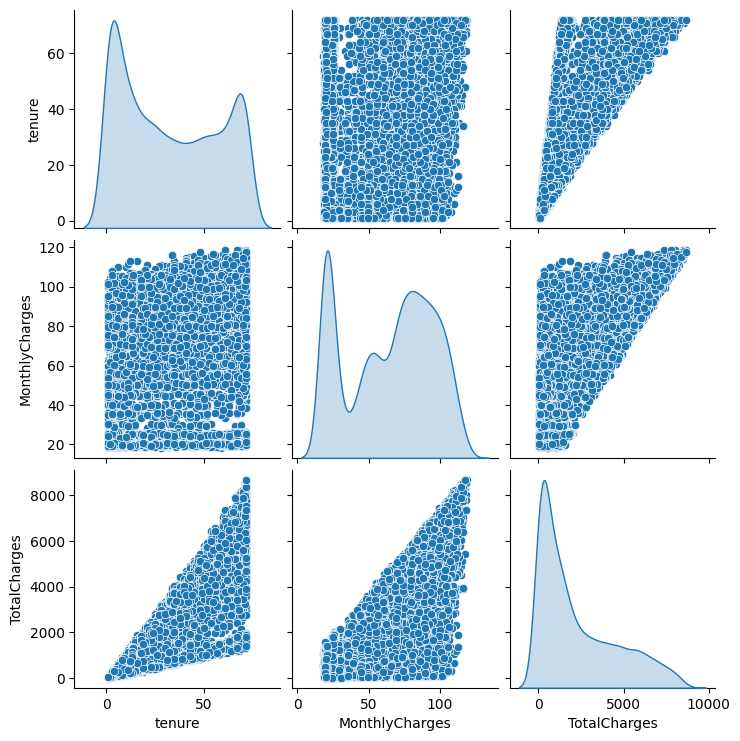

In [27]:
#Pairplot for continuous variable
plt.figure(figsize=(20,8))
sns.pairplot(df_merged,diag_kind='kde')

In [29]:
#Plotting the heatmap for correlation
sns.heatmap(df_merged.corr(),annot=True)

ValueError: could not convert string to float: 'Female'

* There is a strong positive correlation between tenure and Total charges.
* There is a moderate correlation between Monthly charge and Total charge.
* There is a weak correlation between tenure and Monthly charge.

In [30]:
import scipy.stats

In [31]:
from scipy.stats import chi2_contingency

Chi Square Test for Categorical Variable:

* H0 = There is no relationship between the features and the target variable "Churn"
* Ha = There is a relationship between the features and the target variable "Churn"

In [32]:
#Chi Square test for all categorical variable
for col in df_merged.columns[:-1]:
    if df_merged[col].dtype.name=='category':
        cross_tab = pd.crosstab(df_merged[col],df_merged['Churn'])
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        
        if p < 0.05:
            print('For',col,': p =',p,',Since p < 0.05, There is a relationship between',col,'and Churn.')
        else:
            print('For',col,': p =',p,',Since p > 0.05, There is no relationship between',col,'and Churn.')

For gender : p = 0.490488470706551 ,Since p > 0.05, There is no relationship between gender and Churn.
For SeniorCitizen : p = 2.4792557203954705e-36 ,Since p < 0.05, There is a relationship between SeniorCitizen and Churn.
For Partner : p = 3.97379757451591e-36 ,Since p < 0.05, There is a relationship between Partner and Churn.
For Dependents : p = 2.0196592017051303e-42 ,Since p < 0.05, There is a relationship between Dependents and Churn.
For PhoneService : p = 0.34992398942431924 ,Since p > 0.05, There is no relationship between PhoneService and Churn.
For MultipleLines : p = 0.0035679273999811405 ,Since p < 0.05, There is a relationship between MultipleLines and Churn.
For InternetService : p = 5.831198962237274e-159 ,Since p < 0.05, There is a relationship between InternetService and Churn.
For OnlineSecurity : p = 1.4006867477839222e-184 ,Since p < 0.05, There is a relationship between OnlineSecurity and Churn.
For OnlineBackup : p = 7.776099238804965e-131 ,Since p < 0.05, There

In [33]:
#Dropping gender, phoneservice column
df_merged = df_merged.drop([],axis=1)'gender','PhoneService'

T-test Test for Continuous Variable:

H0 = There is no relationship between the features and the target variable "Churn"


Ha = There is a relationship between the features and the target variable "Churn"

In [34]:
#Independent t test
from scipy.stats import ttest_ind
col = df_merged.select_dtypes('float64').columns
for c in col:
    x = np.array(df_merged[c][df_merged['Churn']=="Yes"])
    y = np.array(df_merged[c][df_merged['Churn']=="No"])
    t, p_value = ttest_ind(x,y,axis=0)
    print('p_value:',p_value)
    if p_value < 0.05:          #assuming significant level at 0.05
        print('There is a significant difference in',c, 'feature with different category of churn')
    else:
        print('There is no significant difference in',c, 'feature with different category of churn')

p_value: 9.437650217574845e-207
There is a significant difference in tenure feature with different category of churn
p_value: 6.760843117980302e-60
There is a significant difference in MonthlyCharges feature with different category of churn
p_value: 4.876865689694506e-64
There is a significant difference in TotalCharges feature with different category of churn


Text(0.5, 1.0, 'Total Charges')

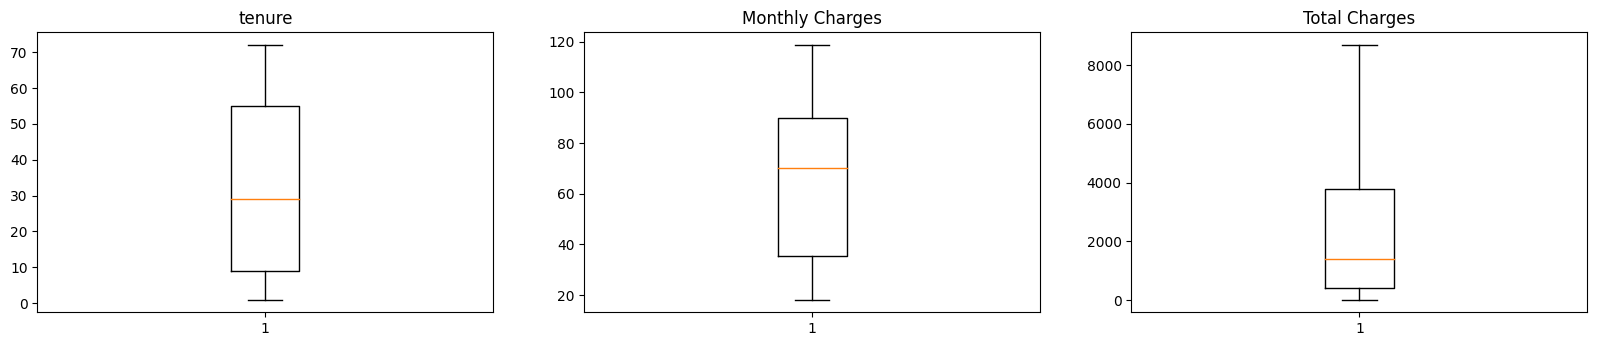

In [35]:
#Plotting boxplot for continuous variable to detect outliers
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.boxplot(df_merged['tenure'])
plt.title("tenure")
plt.subplot(2,3,2)
plt.boxplot(df_merged['MonthlyCharges'])
plt.title("Monthly Charges")
plt.subplot(2,3,3)
plt.boxplot(df_merged['TotalCharges'])
plt.title("Total Charges")

* There is  no outlier in the contiouns variable

# Data Preparation and Modeling

In [36]:
#Encoding all the categorical variable
replace = {'Partner':{'No':0, 'Yes':1},'Dependents':{'No':0, 'Yes':1},
         'PaperlessBilling':{'No':0, 'Yes':1},'Churn':{'No':0, 'Yes':1}}

one_hot_encoding = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                    'StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [37]:
df_merged = df_merged.replace(replace)
df_merged = pd.get_dummies(df_merged,columns=one_hot_encoding)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
#Splitting data into x , y
x = df_merged.drop('Churn',axis=1)#dropping gender and phoneservice feature as there is no relationship with churn.
y = df_merged['Churn']

In [40]:
#Splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.80,random_state=1)

In [41]:
#Scaling the data
scl = StandardScaler()
x_train_scaled = scl.fit_transform(x_train)
x_test_scaled = scl.transform(x_test)

# Model Building and Performence Improvement

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
#Building the decision tree model
d_tree = DecisionTreeClassifier(random_state=1)

In [44]:
#Training the model
d_tree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=1)

In [45]:
#Prediction for training set
y_train_pred=d_tree.predict(x_train_scaled)

In [46]:
#Prediction for testing data
y_test_pred = d_tree.predict(x_test_scaled)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

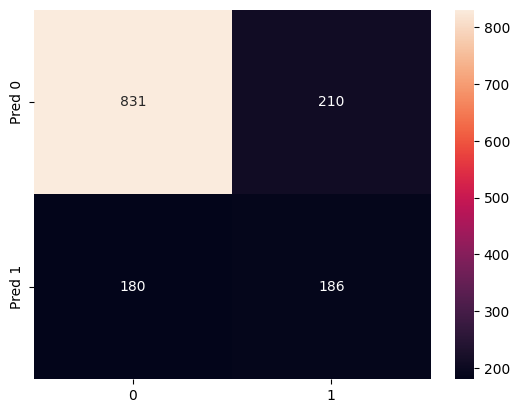

In [47]:
#Plotting the confusion matrix for testing dataset
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm, annot=True,fmt='g')

* 831 values of class 0 is predicted as class 0 by the model.
* 186 values of class 1 is predicted as class 1 by the model.

In [48]:
#Classification report for testing set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.47      0.51      0.49       366

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



In [49]:
#Ceating function to print all the classification score for both training and testing data
def performance_report(model,y_train_predict,y_test_predict):
    print('Accuracy score of training set:', model.score(x_train_scaled,y_train)*100)
    print('Accuracy score of testing set:', model.score(x_test_scaled,y_test)*100)
    print('Recall score of training set:', metrics.recall_score(y_train,y_train_predict)*100)
    print('Recall score of testing set:', metrics.recall_score(y_test,y_test_predict)*100)
    print('Precision score of training set:', metrics.precision_score(y_train,y_train_predict)*100)
    print('Precision score of testing set:', metrics.precision_score(y_test,y_test_predict)*100)
    print('F1-score of training set:', metrics.f1_score(y_train,y_train_predict)*100)
    print('F1-score of testing set:', metrics.f1_score(y_test,y_test_predict)*100)

In [50]:
#Printing clssification score for Decision tree model
performance_report(d_tree,y_train_pred,y_test_pred)

Accuracy score of training set: 99.73333333333333
Accuracy score of testing set: 72.28144989339019
Recall score of training set: 99.1350632069195
Recall score of testing set: 50.81967213114754
Precision score of training set: 99.86595174262735
Precision score of testing set: 46.96969696969697
F1-score of training set: 99.4991652754591
F1-score of testing set: 48.818897637795274


* Accuracy of training data is 99.73%.
* Accuracy of testing data is 72.28%.
* Since the accuracy of training data is very high than testing data, so the model is overfitting the data.
* Also, we can see that recall, precision and f1-score for training data is very high, but for testing data it's very less compared to training data, so we can conclude that the model is overfitting.

In [51]:
#Defining the parameter for hyperparamet tuning
parameter = {'max_depth': [2, 3, 5, 7, 10,15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200, 300],
    'criterion': ["gini", "entropy"]}

In [52]:
#Grid search to improve the performance
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=d_tree,param_grid=parameter)
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200, 300]})

In [53]:
#Getting the best parameter
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 200}

In [54]:
#Training the model with bet parameter
d_tree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=200,
                       random_state=1)

In [55]:
d_tree_tuned.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=200,
                       random_state=1)

In [56]:
#Prediction for training set
y_train_pred = d_tree_tuned.predict(x_train_scaled)

In [57]:
#Prediction for testing set
y_test_pred = d_tree_tuned.predict(x_test_scaled)

<Axes: >

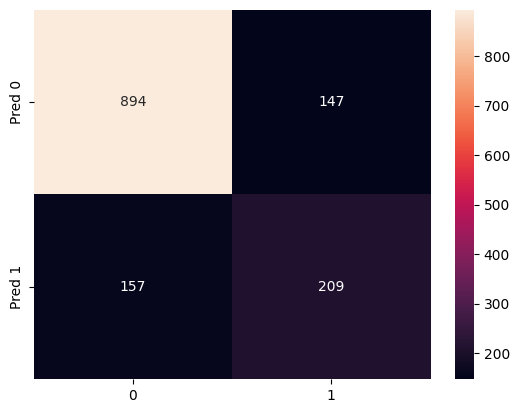

In [58]:
#Plotting the confusion matrix for testing dataset
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm, annot=True,fmt='g')

* 894 values of class 0 is predicted as class 0 by the model.
* 209 values of class 1 is predicted as class 1 by the model.

In [245]:
#Classification report for testing set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1041
           1       0.59      0.57      0.58       366

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [246]:
#Printing clssification score for Tuned Decision tree model
performance_report(d_tree_tuned,y_train_pred, y_test_pred)

Accuracy score of training set: 79.89333333333335
Accuracy score of testing set: 78.39374555792466
Recall score of training set: 60.67864271457086
Recall score of testing set: 57.103825136612016
Precision score of training set: 62.8099173553719
Precision score of testing set: 58.70786516853933
F1-score of training set: 61.72588832487309
F1-score of testing set: 57.89473684210527


* Accuracy score of training set decresed to 79.89%, however accuracy score for testing set improved to 78.39%.
* Recall score of training set decresed to 60.67%, however recall score for testing set improved to 57.10%.
* Precision score of training set decresed to 62.80%, however precision score for testing set improved to 58.70%.
* F1 score of training set decresed to 61.72%, however precision score for testing set improved to 57.89%.

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
#Building the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

In [61]:
#Training the model
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=1)

In [62]:
#Prediction for training data
y_train_pred = rf_model.predict(x_train_scaled)

In [63]:
#Prediction for testing data
y_test_pred = rf_model.predict(x_test_scaled)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

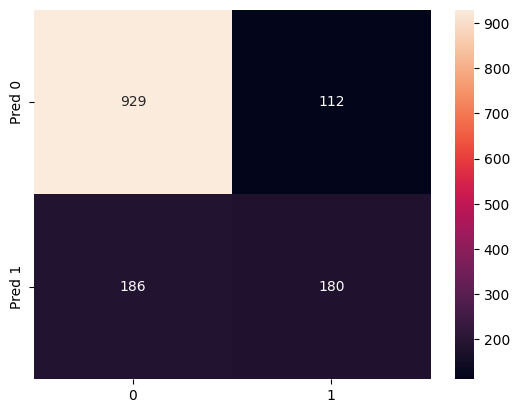

In [64]:
#Plotting the confusion matrix for testing dataset
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm, annot=True,fmt='g')

* 929 values of class 0 is predicted as class 0 by the model.
* 180 values of class 1 is predicted as class 1 by the model.

In [65]:
#Classification report for testing set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.62      0.49      0.55       366

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [66]:
#Printing clssification score for Random Forest model
performance_report(rf_model,y_train_pred,y_test_pred)

Accuracy score of training set: 99.73333333333333
Accuracy score of testing set: 78.82018479033405
Recall score of training set: 99.3346640053227
Recall score of testing set: 49.18032786885246
Precision score of training set: 99.66622162883844
Precision score of testing set: 61.64383561643836
F1-score of training set: 99.50016661112963
F1-score of testing set: 54.71124620060791


* Accuracy of training data is 99.73%.
* Accuracy of testing data is 78.82%.
* Since the accuracy of training data is very high than testing data, so the model is overfitting the data.
* Also, we can see that recall, precision and f1-score for training data is very high, but for testing data it's very less compared to training data, so we can conclude that the model is overfitting.

In [67]:
#Defining the parameter for hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
parameter = {'n_estimators': [150,200,250],
    'max_features':[0.2,0.3,0.4,0.5,0.6],
    'max_samples': [0.3,0.4,0.5,0.6]}

In [68]:
#Grid search to improve the performance
acc_score = metrics.make_scorer(metrics.accuracy_score)
grid = GridSearchCV(estimator=rf,param_grid=parameter,scoring=acc_score)
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_samples': [0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [150, 200, 250]},
             scoring=make_scorer(accuracy_score))

In [257]:
#Getting the best parameters
grid.best_params_

{'max_features': 0.2, 'max_samples': 0.3, 'n_estimators': 200}

In [258]:
#Building the model the with best parameter
rf_estimator_tuned = RandomForestClassifier(max_depth=5,max_features=0.2,max_samples=0.3,
                                            n_estimators=200,random_state=1)

In [259]:
#Training the model
rf_estimator_tuned.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=5, max_features=0.2, max_samples=0.3,
                       n_estimators=200, random_state=1)

In [260]:
#Prediction for training set
y_train_pred = rf_estimator_tuned.predict(x_train_scaled)

In [261]:
#Prediction for testing set
y_test_pred = rf_estimator_tuned.predict(x_test_scaled)

<AxesSubplot:>

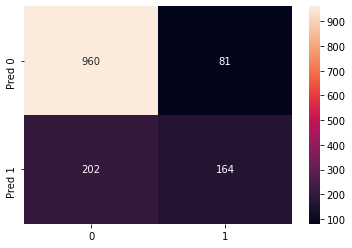

In [262]:
#Printing the confusion matrix for testing dataset
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

* 960 values of class 0 is predicted as class 0 by the model.
* 164 values of class 1 is predicted as class 1 by the model.

In [263]:
#Printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1041
           1       0.67      0.45      0.54       366

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.70      1407
weighted avg       0.79      0.80      0.78      1407



In [264]:
#Printing the classification score for tuned Random Forest model
performance_report(rf_estimator_tuned,y_train_pred,y_test_pred)

Accuracy score of training set: 80.40888888888888
Accuracy score of testing set: 79.8862828713575
Recall score of training set: 46.04125083166999
Recall score of testing set: 44.80874316939891
Precision score of training set: 70.39674465920652
Precision score of testing set: 66.93877551020408
F1-score of training set: 55.67176186645213
F1-score of testing set: 53.68248772504091


* Accuracy score of training set decresed to 80.40%, however accuracy score for testing set improved to 79.88%.
* Recall score of training set decresed to 46.04%, and for testing set also decresed to 44.80%.
* Precision score of training set decresed to 78.01%, however precision score for testing set improved to 66.93%.
* F1 score of training set decresed to 70.39%, however precision score for testing set improved to 63.23%.
* The accuracy of the testing data is closed to training data. So there is no overfitting in the model.

# Adaboost

In [265]:
from sklearn.ensemble import AdaBoostClassifier

In [266]:
#Building Adaboost model
Ada_model = AdaBoostClassifier(random_state=1)

In [267]:
#Training the model
Ada_model.fit(x_train_scaled,y_train)

AdaBoostClassifier(random_state=1)

In [268]:
#Prediction for Training set
y_train_pred = Ada_model.predict(x_train_scaled)

In [269]:
#Prediction Testing set
y_test_pred= Ada_model.predict(x_test_scaled)

<AxesSubplot:>

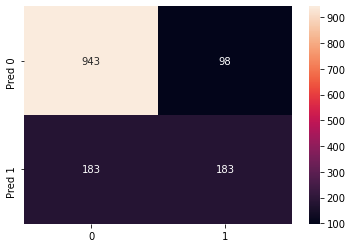

In [270]:
#Plotting the confusion matrix for testing data
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

* 943 values of class 0 is predicted as class 0 by the model.
* 183 values of class 1 is predicted as class 1 by the model.

In [271]:
#Printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.65      0.50      0.57       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [272]:
#Printing the classification score
performance_report(Ada_model,y_train_pred,y_test_pred)

Accuracy score of training set: 81.01333333333334
Accuracy score of testing set: 80.02842928216063
Recall score of training set: 54.62408516300732
Recall score of testing set: 50.0
Precision score of training set: 68.019884009942
Precision score of testing set: 65.12455516014235
F1-score of training set: 60.59040590405903
F1-score of testing set: 56.568778979907265


* Accuracy of training data is 81.01%.
* Accuracy of testing data is 80.02%.
* We can see that Accuracy score of testing data is very close to training data. So the model is performing well as there is no overfitting. Also recall, precision and F1 score for both training and testing data is close to each other.

In [273]:
#Defining the parameter for hyperparameter tuning
parameter = parameter = {'n_estimators': [50, 100,150,200,250],'algorithm' : ['SAMME','SAMME.R'],
                        'learning_rate':[0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]}

In [274]:
#Grid search to improve the performance
acc_score = metrics.make_scorer(metrics.accuracy_score)
grid = GridSearchCV(estimator=Ada_model,param_grid=parameter,scoring=acc_score)
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring=make_scorer(accuracy_score))

In [275]:
#Getting the best parameter
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.2, 'n_estimators': 200}

In [276]:
#Building the tuned Adaboost model
Ada_estimator_tuned = AdaBoostClassifier(algorithm='SAMME',learning_rate=1.2,n_estimators=200)

In [277]:
#Training the tuned model
Ada_estimator_tuned.fit(x_train_scaled,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.2, n_estimators=200)

In [278]:
#Prediction for Training data
y_train_pred = Ada_estimator_tuned.predict(x_train_scaled)

In [279]:
#Prediction testing data
y_test_pred = Ada_estimator_tuned.predict(x_test_scaled)

<AxesSubplot:>

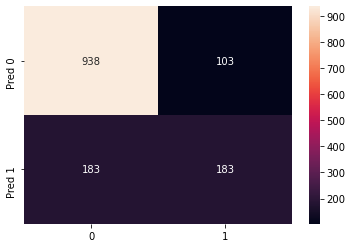

In [280]:
#printing the confusion matrix for testing data
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

* 938 values of class 0 is predicted as class 0 by the model.
* 183 values of class 1 is predicted as class 1 by the model.

In [281]:
#Printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.50      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [282]:
#Printing the classification score
performance_report(Ada_estimator_tuned,y_train_pred,y_test_pred)

Accuracy score of training set: 80.81777777777778
Accuracy score of testing set: 79.67306325515281
Recall score of training set: 54.49101796407185
Recall score of testing set: 50.0
Precision score of training set: 67.46293245469522
Precision score of testing set: 63.98601398601399
F1-score of training set: 60.28708133971291
F1-score of testing set: 56.13496932515337


* We can see that performnce of the model slightly improved after tuning the model.

# Gradient Boost

In [283]:
from sklearn.ensemble import GradientBoostingClassifier

In [284]:
#Building the Gradient boost model
gb_model = GradientBoostingClassifier(random_state=1)

In [285]:
#Training the model
gb_model.fit(x_train_scaled,y_train)

GradientBoostingClassifier(random_state=1)

In [286]:
#Prediction for training data
y_train_pred = gb_model.predict(x_train_scaled)

In [287]:
#Prediction for testing data
y_test_pred = gb_model.predict(x_test_scaled)

<AxesSubplot:>

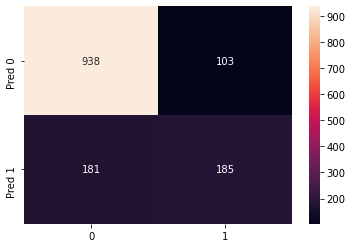

In [288]:
#Printing the confusion matrix for testing data
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

* 938 values of class 0 is predicted as class 0 by the model.
* 185 values of class 1 is predicted as class 1 by the model.

In [289]:
#printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [290]:
#Printing the classification score
performance_report(gb_model,y_train_pred,y_test_pred)

Accuracy score of training set: 83.14666666666668
Accuracy score of testing set: 79.81520966595593
Recall score of training set: 58.2168995342648
Recall score of testing set: 50.54644808743169
Precision score of training set: 73.22175732217573
Precision score of testing set: 64.23611111111111
F1-score of training set: 64.86286137879912
F1-score of testing set: 56.574923547400616


* Accuracy of training data is 83.14%.
* Accuracy of testing data is 79.81%.
* Since the accuracy of training data is higher than testing data, so the model is slightly overfitting the data.
* Also, we can see that recall, precision and f1-score for training data is high, but for testing data it's less compared to training data, so we can conclude that the model is stlightly overfitting.

In [291]:
#defining the parameters
parameter = {'n_estimators': [100, 150,200],'max_depth':np.arange(3,7,1),
                         'max_features':np.arange(0.2,0.6,0.1)
                        }

In [292]:
#Grid search to improve the performance
acc_score = metrics.make_scorer(metrics.accuracy_score)
grid = GridSearchCV(estimator=gb_model,param_grid=parameter,scoring=acc_score)
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_depth': array([3, 4, 5, 6]),
                         'max_features': array([0.2, 0.3, 0.4, 0.5]),
                         'n_estimators': [100, 150, 200]},
             scoring=make_scorer(accuracy_score))

In [293]:
#getting the best parameter
grid.best_params_

{'max_depth': 3, 'max_features': 0.30000000000000004, 'n_estimators': 100}

In [294]:
#Building the tuned Gradient boost model
gb_estimator_tuned = GradientBoostingClassifier(max_depth=3,max_features=0.3,n_estimators=100,random_state=1)

In [295]:
#training the model
gb_estimator_tuned.fit(x_train_scaled,y_train)

GradientBoostingClassifier(max_features=0.3, random_state=1)

In [296]:
#Prediction for training data
y_train_pred = gb_estimator_tuned.predict(x_train_scaled)

In [297]:
#Prediction for testing data
y_test_pred = gb_estimator_tuned.predict(x_test_scaled)

<AxesSubplot:>

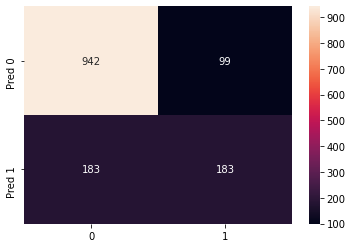

In [298]:
#Printing the confusion matrix for testing data
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['Pred 0','Pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

* 942 values of class 0 is predicted as class 0 by the model.
* 183 values of class 1 is predicted as class 1 by the model.

In [299]:
#printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.50      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [300]:
#Printing the classification score
performance_report(gb_estimator_tuned,y_train_pred,y_test_pred)

Accuracy score of training set: 82.52444444444444
Accuracy score of testing set: 79.95735607675905
Recall score of training set: 56.55355954757152
Recall score of testing set: 50.0
Precision score of training set: 72.03389830508475
Precision score of testing set: 64.8936170212766
F1-score of training set: 63.3619083115915
F1-score of testing set: 56.481481481481474


* The model is perforing well.

# Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression

In [302]:
log_model = LogisticRegression()

In [303]:
#Training the model
log_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [304]:
#Prediction for testing data
y_test_pred = log_model.predict(x_test_scaled)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [306]:
#Accuracy of training data
log_model.score(x_train_scaled,y_train)

0.8076444444444445

In [307]:
#Accuracy of testing data
log_model.score(x_test_scaled,y_test)

0.7967306325515281

In [308]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_test_pred)
print(cm)

[[925 116]
 [170 196]]


In [309]:
#Creating dataframe of comfusion matrix
cm_df = pd.DataFrame(cm,index=['Pred_0','Pred_1'],columns=['0','1'])
cm_df

,0,1
Pred_0,925,116
Pred_1,170,196


<AxesSubplot:>

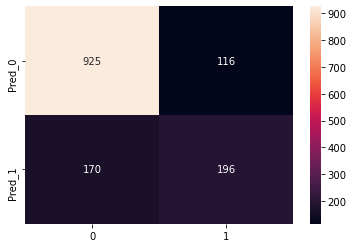

In [310]:
#Plotting heatmap of confusion matrix dataframe
sns.heatmap(cm_df,annot=True,fmt='0.6g')

In [311]:
# Printing the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# SVM

In [312]:
from sklearn.svm import SVC

In [313]:
#Creating svm model
svm_model = SVC()

In [314]:
#Training svm model
svm_model.fit(x_train_scaled,y_train)

SVC()

In [315]:
#Predict for testing data
pred_y= svm_model.predict(x_test_scaled)

In [316]:
#Accuracy score of training data
svm_model.score(x_train_scaled,y_train)

0.8163555555555555

In [317]:
#Accuracy score of testing data
svm_model.score(x_test_scaled,y_test)

0.7903340440653873

<AxesSubplot:>

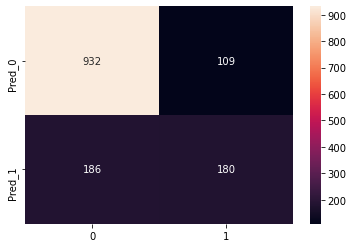

In [318]:
#confusion matrix dataframe
cm_df = pd.DataFrame(confusion_matrix(y_test,pred_y),index=['Pred_0','Pred_1'],columns=['0','1'])
sns.heatmap(cm_df,annot=True,fmt='0.6g')

In [319]:
#Printing classification report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.62      0.49      0.55       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# K nearest neighbour

In [320]:
from sklearn.neighbors import KNeighborsClassifier

In [321]:
#Creating KNN model
knn_model = KNeighborsClassifier()

In [322]:
#Training KNN model
knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [323]:
#Predict for testing data
pred_y= knn_model.predict(x_test_scaled)

In [324]:
#Accuracy score of training data
knn_model.score(x_train_scaled,y_train)

0.8312888888888889

In [325]:
#Accuracy score of testing data
knn_model.score(x_test_scaled,y_test)

0.7640369580668088

<AxesSubplot:>

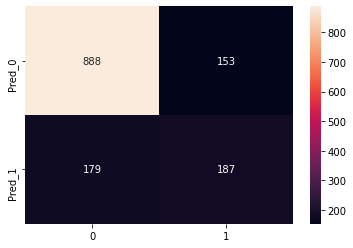

In [326]:
#confusion matrix dataframe
cm_df = pd.DataFrame(confusion_matrix(y_test,pred_y),index=['Pred_0','Pred_1'],columns=['0','1'])
sns.heatmap(cm_df,annot=True,fmt='0.6g')

In [327]:
#Printing classification report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1041
           1       0.55      0.51      0.53       366

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



# Parameter tune for SVM Model

In [328]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [329]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [330]:
# fitting the model for grid search
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   2.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   2.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   1.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.774 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   1.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   1.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.779 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   1.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.779 total time=   4.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.771 total time=   3.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=   3.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.757 total time=   3.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.754 total time=   1.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.745 total time=   1.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.744 total time=   1.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.746 total time=   1.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.737 total time=   1.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.740 total time=   6.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.750 total time=   7.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.746 total time=   7.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [331]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [332]:
#Printing the best score
grid.best_score_

0.8049777777777777

In [334]:
svm_model_tuned = SVC(C=100,gamma=0.001,kernel="rbf")

In [335]:
svm_model_tuned.fit(x_train_scaled,y_train)

SVC(C=100, gamma=0.001)

In [336]:
#Checking the training accuracy score for c=1000, gamma=0.0001
svm_model_tuned.score(x_train_scaled,y_train)

0.8112

In [337]:
#Checking the testing accuracy score for c=1000, gamma=0.0001
svm_model_tuned.score(x_test_scaled,y_test)

0.7974413646055437

# Parameter tune for KNN Model

In [338]:
#Defing the range of parameter
leaf_size=list(range(1,100))
n_neighbors = list(range(1, 16, 2))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

In [339]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,leaf_size=leaf_size)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_scaled,y_train)

In [340]:
grid_result.best_score_

0.7856052034411484

In [341]:
#Finding the best value for the parameter
grid_result.best_params_

{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 13,
 'weights': 'uniform'}

In [342]:
knn_tuned = KNeighborsClassifier(leaf_size=1,n_neighbors=13,metric='manhattan',weights="uniform")

In [343]:
knn_tuned.fit(x_train_scaled,y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=13)

In [344]:
#Checking the training accuracy score
knn_tuned.score(x_train_scaled,y_train)

0.8085333333333333

In [345]:
#Cheking the testing accuracy score for n_neighbors=5,weights=distance,metric=manhattan,leaf_size=71
knn_tuned.score(x_test_scaled,y_test)

0.7775408670931059

# Parameter tune for Logistic regression

In [346]:
#Defining the parameter
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(log_model, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

In [347]:
LR_search.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.800 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.810 total time=   0.0s
[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.798 total time=   0.0s
[CV 1/5] END C=0.1, penalt

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.798 total time=   0.3s
[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.814 total time=   0.0s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.797 total time=   0.4s
[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.812 total time=   0.1s
[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.811 total time=   0.1s
[CV 1/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.0s
[CV 2/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.814 total time=   0.0s
[CV 3/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 4/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 5/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.0s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END .....C=1, penal

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.796 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.814 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.799 total time=   0.3s
[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.812 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.812 total time=   0.3s
[CV 1/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.798 total time=   1.3s
[CV 2/5] END C=10, penalty=l

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.798 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.813 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.799 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.812 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.811 total time=   0.4s
[CV 1/5] END C=10, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 2/5] END C=10, penalty=l2, solver=newton-cg;, score=0.813 total time=   0.0s
[CV 3/5] END C=10, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 4/5] END C=10, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 5/5] END C=10, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.0s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.813 total time=   0.0s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.0s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.808 total time=   0.0s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.798 total time=   0.0s
[CV 2/5] END C=10, penalty=l

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.798 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.813 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.798 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.812 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.810 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.798 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.813 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.799 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.812 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.810 total time=   0.3s
[CV 1/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.796 total time=   1.5s
[CV 2/5] END C=100, penalty

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.798 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.813 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.798 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.812 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.810 total time=   0.3s
[CV 1/5] END C=100, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.0s
[CV 2/5] END C=100, penalty=l2, solver=newton-cg;, score=0.813 total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 5/5] END C=100, penalty=l2, solver=newton-cg;, score=0.806 total time=   0.0s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.0s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.813 total time=   0.0s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.0s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.806 total time=   0.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 2/5] END C=100, pe

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.796 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.813 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.798 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.812 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.806 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.798 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.813 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.798 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.812 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.810 total time=   0.2s
[CV 1/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.796 total time=   1.4s
[CV 2/5] END C=1000, penal

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.797 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.813 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.798 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.812 total time=   0.4s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.810 total time=   0.4s
[CV 1/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.0s
[CV 2/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.813 total time=   0.0s
[CV 3/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 4/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 5/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.805 total time=   0.0s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.0s
[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.813 total time=   0.0s
[CV 3/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.0s
[CV 4/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 2/5] END C=1

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1000, penalty=l2, solver=sag;, score=0.796 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1000, penalty=l2, solver=sag;, score=0.813 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1000, penalty=l2, solver=sag;, score=0.798 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1000, penalty=l2, solver=sag;, score=0.812 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1000, penalty=l2, solver=sag;, score=0.806 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.797 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.813 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.798 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.812 total time=   0.3s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solve

[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.810 total time=   0.2s


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [348]:
#Fing the accuracy score
LR_search.best_score_

0.8067555555555556

In [349]:
#Finding the best parameter value
LR_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [350]:
log_model_tuned =LogisticRegression(C=10,penalty='l1',solver='saga')

In [351]:
log_model_tuned.fit(x_train_scaled,y_train)

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, penalty='l1', solver='saga')

In [352]:
log_model_tuned.score(x_test_scaled,y_test)

0.7967306325515281

# Naive Bayes

In [353]:
from sklearn.naive_bayes import GaussianNB

In [354]:
nb =GaussianNB()

In [355]:
nb.fit(x_train_scaled,y_train)

GaussianNB()

In [356]:
nb.score(oversampled_x,oversampled_y)

0.744784085395439

In [357]:
nb.score(x_test_scaled,y_test)

0.6886993603411514

# Comparing All the Models

In [367]:
def get_metrics_score(model):
    
    score_list = []
    
    pred_train = model.predict(x_train_scaled)
    pred_test = model.predict(x_test_scaled)
    
    train_acc = round(model.score(x_train_scaled,y_train)*100,2)
    test_acc = round(model.score(x_test_scaled,y_test)*100,2)
    
    train_recall = round(metrics.recall_score(y_train,pred_train)*100,2)
    test_recall = round(metrics.recall_score(y_test,pred_test)*100,2)
    
    train_precision = round(metrics.precision_score(y_train,pred_train)*100,2)
    test_precision = round(metrics.precision_score(y_test,pred_test)*100,2)
    
    train_f1 = round(metrics.f1_score(y_train,pred_train)*100,2)
    test_f1 = round(metrics.f1_score(y_test,pred_test)*100,2)
    
    score_list.append([train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1])
    
    return score_list

In [369]:
#Defining the odels
models = [d_tree,d_tree_tuned,rf_model,rf_estimator_tuned,Ada_model,Ada_estimator_tuned,gb_model,gb_estimator_tuned,log_model,
         log_model_tuned,svm_model,svm_model_tuned,knn_model,knn_tuned,nb]
#Creating empty list to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
#looping through the models
for mod in models:
    j = get_metrics_score(mod)
    acc_train.append((j[0][0]))
    acc_test.append((j[0][1]))
    recall_train.append((j[0][2]))
    recall_test.append((j[0][3]))
    precision_train.append((j[0][4]))
    precision_test.append((j[0][5]))
    f1_train.append((j[0][6]))
    f1_test.append((j[0][7]))    

In [370]:
#Creating Dataframe
comparison_frame = pd.DataFrame({'Model':['d_tree','d_tree_tuned','rf_model','rf_estimator_tuned','Ada_model','Ada_estimator_tuned',
                                'gb_model','gb_estimator_tuned','log_model','log_model_tuned','svm_model','svm_model_tuned',
                                         'knn_model','knn_tuned','nb'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,Ada_model,81.01,80.03,54.62,50.00,68.02,65.12,60.59,56.57
7,gb_estimator_tuned,82.52,79.96,56.55,50.00,72.03,64.89,63.36,56.48
3,rf_estimator_tuned,80.41,79.89,46.04,44.81,70.40,66.94,55.67,53.68
6,gb_model,83.15,79.82,58.22,50.55,73.22,64.24,64.86,56.57
11,svm_model_tuned,81.12,79.74,52.56,49.73,69.36,64.31,59.80,56.09
5,Ada_estimator_tuned,80.82,79.67,54.49,50.00,67.46,63.99,60.29,56.13
8,log_model,80.76,79.67,56.09,53.55,66.64,62.82,60.91,57.82
9,log_model_tuned,80.87,79.67,56.02,53.55,66.98,62.82,61.01,57.82
10,svm_model,81.64,79.03,53.29,49.18,70.76,62.28,60.80,54.96
2,rf_model,99.73,78.82,99.33,49.18,99.67,61.64,99.50,54.71


* We can go ahead with Ada_model, as both training and testing accuracy is closed to each other and highest amongs all the models.

# Model Deployment

In [372]:
#Saving the Trined model
import pickle
filename = 'trained_model.sav'
pickle.dump(Ada_model,open(filename,'wb'))

In [373]:
#Loading the saved model
loaded_model =pickle.load(open('trained_model.sav','rb'))

In [374]:
loaded_model.predict(x_test_scaled)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [380]:
#Saving the scaling model
filename1 = 'trained_model_scaled.sav'
pickle.dump(scl,open(filename1,'wb'))

In [381]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled,sav','rb'))

In [382]:
loaded_model.predict(loaded_model_scaled.transform(x_test))

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)